# Predicting Success on Youtube - Final Notebook

- First, we imported every tool we thought we would need for this project. Then we brought in the youtube data  we collected from the Kaggle website and studied it's makeup. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import json
import datetime
from collections import Counter
# Significance Test
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.pipeline import Pipeline
import requests
import re
import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('Data/USvideos.csv')

In [3]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [4]:
df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [5]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# Data Cleaning

- After visually analyzing the data, we begane by cleaning the trending-date and publish time, by changing them to datetime objects and then breaking them down even further into day, month, and year.  

In [7]:
def clean_trending_date(date):
    y,d,m = date.split('.')
    return datetime.date(int(y)+2000,int(m),int(d))
def clean_publish_time(time):
    y,m,d = time.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

In [8]:
trending_date = []
for date in list(range(0,len(df))):
    trending_date.append(clean_trending_date(df['trending_date'][date]))
df['trending_date'] = trending_date

In [9]:
publish_date = []
for date in list(range(0,len(df))):
    publish_date.append(clean_publish_time(df['publish_time'][date]))
df['publish_time'] = publish_date

In [10]:
df['trending_month'] = pd.DatetimeIndex(df['trending_date']).month

In [11]:
df['trending_year'] = pd.DatetimeIndex(df['trending_date']).year

In [12]:
df['trending_day'] = pd.DatetimeIndex(df['trending_date']).day

In [13]:
df['publish_month'] = pd.DatetimeIndex(df['publish_time']).month

In [14]:
df['publish_year'] = pd.DatetimeIndex(df['publish_time']).year

In [15]:
df['publish_day'] = pd.DatetimeIndex(df['publish_time']).day

In [16]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11,2017,14,11,2017,13
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,False,"One year after the presidential election, John...",11,2017,14,11,2017,13
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,2017,14,11,2017,12
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,False,Today we find out if Link is a Nickelback amat...,11,2017,14,11,2017,13
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,False,I know it's been a while since we did this sho...,11,2017,14,11,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,6,2018,14,5,2018,18
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,...,False,False,False,NaN,6,2018,14,5,2018,18
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,False,False,False,I had so much fun transforming Safiyas hair in...,6,2018,14,5,2018,18
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,False,False,False,How Black Panther Should Have EndedWatch More ...,6,2018,14,5,2018,17


- Then we created our Target column 'Successful' by creating a boolean column that stated if each video had +180,000 views.

In [17]:
views = list(df['views'].values)

In [18]:
Is_Successful = []
for view in list(range(0,len(df))):
    if views[view] > 180000:
            Is_Successful.append(True)
    else:
            Is_Successful.append(False)
    
df['Successful'] = Is_Successful

In [19]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11,2017,14,11,2017,13,True
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,"One year after the presidential election, John...",11,2017,14,11,2017,13,True
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,2017,14,11,2017,12,True
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,Today we find out if Link is a Nickelback amat...,11,2017,14,11,2017,13,True
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,I know it's been a while since we did this sho...,11,2017,14,11,2017,12,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,False,False,The Cat Who Caught the Laser - Aaron's Animals,6,2018,14,5,2018,18,True
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,...,False,False,NaN,6,2018,14,5,2018,18,True
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,False,False,I had so much fun transforming Safiyas hair in...,6,2018,14,5,2018,18,True
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,False,False,How Black Panther Should Have EndedWatch More ...,6,2018,14,5,2018,17,True


- Next we worked towards changing the 'tags' column from single strings to a list of individual strings contain each tag per video. We then took the numerical value of # of tags per video and made a new column "Number_of_Tags.

In [20]:
df['tag_list'] = df['tags'].astype('str').str.split('|')

In [21]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,tag_list
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11,2017,14,11,2017,13,True,[SHANtell martin]
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,"One year after the presidential election, John...",11,2017,14,11,2017,13,True,"[last week tonight trump presidency, ""last wee..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,2017,14,11,2017,12,True,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""..."
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,Today we find out if Link is a Nickelback amat...,11,2017,14,11,2017,13,True,"[rhett and link, ""gmm"", ""good mythical morning..."
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,I know it's been a while since we did this sho...,11,2017,14,11,2017,12,True,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,False,The Cat Who Caught the Laser - Aaron's Animals,6,2018,14,5,2018,18,True,"[aarons animals, ""aarons"", ""animals"", ""cat"", ""..."
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,...,False,NaN,6,2018,14,5,2018,18,True,[[none]]
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,False,I had so much fun transforming Safiyas hair in...,6,2018,14,5,2018,18,True,[I gave safiya nygaard a perfect hair makeover...
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,False,How Black Panther Should Have EndedWatch More ...,6,2018,14,5,2018,17,True,"[Black Panther, ""HISHE"", ""Marvel"", ""Infinity W..."


In [22]:
num_of_tags = []
for number in list(range(0,len(df))):
    num_of_tags.append(len(df['tag_list'][number]))

In [23]:
df['Number_of_Tags'] = num_of_tags

- We needed to clean 'category_id' by converting the numeric values into the Genre that numeric value indicates. We learned which Genre each number represented from the Youtube (https://mixedanalytics.com/youtube-video-category-id-list/)

In [24]:
df['category_id'] = df['category_id'].astype(str)

In [25]:
categories = []
for category in df['category_id']:
    if category.__contains__('10'):
        categories.append('Music')
    elif category.__contains__('15'):
        categories.append('Pets & Animals')
    elif category.__contains__('17'):
        categories.append('Sport')
    elif category.__contains__('19'):
        categories.append('Travel & Events')
    elif category.__contains__('20'):
        categories.append('Gaming')
    elif category.__contains__('22'):
        categories.append('People & Blogs')
    elif category.__contains__('23'):
        categories.append('Comedy')
    elif category.__contains__('24'):
        categories.append('Entertainment')
    elif category.__contains__('25'):
        categories.append('News & Politics')
    elif category.__contains__('26'):
        categories.append('How-to & Style')
    elif category.__contains__('27'):
        categories.append('Education')
    elif category.__contains__('28'):
        categories.append('Science & Technology')
    elif category.__contains__('29'):
        categories.append('Non-profits & Activism')
    elif category.__contains__('43'):
        categories.append('Shows')
    elif category.__contains__('1'):
        categories.append('Film & Animation')
    elif category.__contains__('2'):
        categories.append('Cars & Vehicles')

df['Genre'] = categories

In [26]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,tag_list,Number_of_Tags,Genre
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,...,11,2017,14,11,2017,13,True,[SHANtell martin],1,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,11,2017,14,11,2017,13,True,"[last week tonight trump presidency, ""last wee...",4,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,11,2017,14,11,2017,12,True,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",23,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,11,2017,14,11,2017,13,True,"[rhett and link, ""gmm"", ""good mythical morning...",27,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,11,2017,14,11,2017,12,True,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",14,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,6,2018,14,5,2018,18,True,"[aarons animals, ""aarons"", ""animals"", ""cat"", ""...",14,Pets & Animals
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,...,6,2018,14,5,2018,18,True,[[none]],1,People & Blogs
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,6,2018,14,5,2018,18,True,[I gave safiya nygaard a perfect hair makeover...,24,Entertainment
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,6,2018,14,5,2018,17,True,"[Black Panther, ""HISHE"", ""Marvel"", ""Infinity W...",22,Film & Animation


- For 'description' we went through the same proccess we did for "tags". We broke down each videos description in a new column 'description_length' to determine if the length of a video description is coorelated with success.

In [27]:
df['description'] = df['description'].astype('str').str.split(' ')

In [28]:
num_of_words = []
for num in list(range(0,len(df))):
    num_of_words.append(len(df['description'][num]))

In [29]:
df['description_length'] = num_of_words

- Here we were interested in finding out the most commonly used tags in videos that fall into the "Film and animation catergory. 

In [30]:
df['tag_list'] = df['tag_list'].astype(str)

In [31]:
df['Genre'] = df['Genre'].astype(str)

In [32]:
def top_words_of_tags(category, figure_name, k=5):
    nlp_33 = df[df['Genre'] == category]
    cnt_c2 = Counter()
    for title in nlp_33['tag_list']:
        for token in title.split():
            cnt_c2[token] += 1
    dist_c2 = cnt_c2.most_common(k)
    top_words_c2 = []
    freqs_c2 = []
    for word, freq in dist_c2:
        top_words_c2.append(word)
        freqs_c2.append(freq)
    fig= plt.figure(figsize=(8,6))
    plt.xticks(rotation=90)
    plt.bar(top_words_c2, freqs_c2, color='skyblue')
    plt.title(figure_name, fontsize=20)
    plt.xlabel('Keyword', fontsize=17)
    plt.ylabel('Video Tags', fontsize=17)

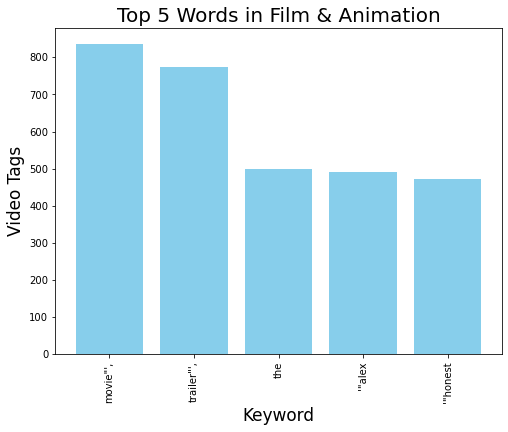

In [33]:
top_words_of_tags('Film & Animation', 'Top 5 Words in Film & Animation')

- This data predominately includes only "trending" videos, but there were a handful (71) that did were outliers in that they were videos that never seemed to get off the ground. We elimated them by setting the dataframe to only include rows with >1000 views and >100 likes. 
- Columns that were dropped such as comment_disabled, ratings_disabled, thumbnail_link, and video_error_or_removed we discarded the columns we deemed overall useless to our model. We then also dropped the original columns that we no longer need because we converted them into a new more useable column (ex. 'tags')

In [34]:
df = df.loc[(df['views'] > 1000) & (df['likes'] > 100 )]

In [35]:
df = df.drop(columns='views')

In [36]:
df= df.drop(columns="description")

In [37]:
df = df.drop(columns="category_id")

In [38]:
df = df.drop(columns='tag_list')

In [39]:
df = df.drop(columns='tags')

In [40]:
df = df.drop(columns='publish_time')

In [41]:
df = df.drop(columns='trending_date')

In [42]:
df = df.drop(columns="video_error_or_removed")

In [43]:
df = df.drop(columns="thumbnail_link")

In [44]:
df = df.drop(columns='ratings_disabled')

In [45]:
df = df.drop(columns="channel_title")

In [46]:
df = df.drop(columns="title")

In [47]:
df = df.drop(columns='comments_disabled')

In [48]:
df = df.drop(columns="video_id")

- Now that our data is clean, it is time to get it ready to go into our models. We set the column "Successful" as our target and ran our train test split. Next we looked at how accurate our model would be if it just guess successful every time. 

In [49]:
X = df.drop(columns='Successful')
y = df['Successful']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.20)

In [51]:
X_test, X_hold, y_test, y_hold = train_test_split(X_test, y_test, random_state=42, test_size=.20)

In [52]:
#Modeless Baseline
pd.Series(y_train).value_counts(normalize=True)

True     0.818091
False    0.181909
Name: Successful, dtype: float64

In [53]:
X_train

,likes,dislikes,comment_count,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Number_of_Tags,Genre,description_length
28642,13920,275,2074,4,2018,14,4,2018,7,22,Education,114
40092,162098,3566,15357,6,2018,10,5,2018,23,13,Comedy,63
3391,3250,926,1297,11,2017,30,11,2017,22,4,Music,15
13974,30014,769,2654,1,2018,24,1,2018,17,27,How-to & Style,159
39995,221056,15832,44801,6,2018,10,6,2018,5,1,Film & Animation,93
...,...,...,...,...,...,...,...,...,...,...,...,...
6632,60106,618,5304,12,2017,17,12,2017,15,7,Music,46
11960,139665,65698,26132,1,2018,14,1,2018,8,22,Entertainment,109
39251,35357,1841,3308,6,2018,6,5,2018,25,25,Entertainment,269
922,1899,74,82,11,2017,18,11,2017,15,4,Music,29


- Next we setup both our categorical columns and numerical columns, OneHotEncoding our categorical metric of genre. Then we defined our evaluate code so that we could use it over and over without retyping it. 

In [54]:
cat_columns = [c for c in X_train.columns if X_train[c].dtype == 'O']
cat_columns

num_columns = [
    'likes',
    'dislikes',
    'comment_count',
    'Number_of_Tags',
    'description_length',
    'trending_month',
    'trending_year',
    'trending_day',
    'publish_month',
    'publish_year',
    'publish_day'
]

used_cols = [*cat_columns, *num_columns]
used_cols

['Genre',
 'likes',
 'dislikes',
 'comment_count',
 'Number_of_Tags',
 'description_length',
 'trending_month',
 'trending_year',
 'trending_day',
 'publish_month',
 'publish_year',
 'publish_day']

In [55]:
cat_transformer = OneHotEncoder(drop='first', handle_unknown = 'error', sparse= False)

num_transformer = StandardScaler()
preprocessor = ColumnTransformer([
    ('cats', cat_transformer, cat_columns),
    ('nums', num_transformer, num_columns)
])

In [56]:
def evaluate(model, Xtr, Xte, ytr, yte):
    train_preds = model.predict(X_train[used_cols])
    test_preds = model.predict(X_test[used_cols])

    train_probas = clf_dt.predict_proba(X_train[used_cols])[:, 1]
    test_probas = clf_dt.predict_proba(X_test[used_cols])[:, 1]

    plot_confusion_matrix(model, Xte, yte)
    plot_roc_curve(model, X_test[used_cols], y_test);
    
    print(f"Train F1: {f1_score(ytr, train_preds):.4f}")
    print(f"Train Precision: {precision_score(ytr, train_preds):.4f}")
    print(f"Train ROC-AUC: {roc_auc_score(ytr, train_preds):.4f}")
    print("*" * 20)
    print(f"Test F1: {f1_score(yte, test_preds):.4f}")
    print(f"Test Precision: {precision_score(yte, test_preds):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(yte, test_preds):.4f}")

<AxesSubplot:>

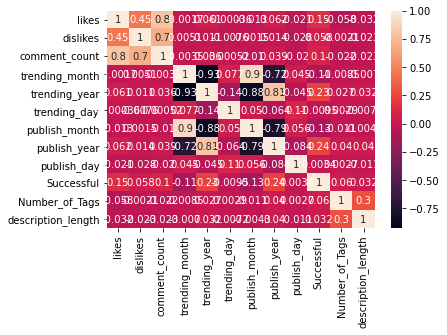

In [57]:
sns.heatmap(df.corr(), annot=True)

# All Elements
- We chose to use a decision tree model because it lays out the problem so that all options can be challenged. This allows us to analyze fully the possible consequences of a decision. More specifically, this will provide us with insight on Youtube algorithm designed to pick trending videos. Once we know what causes a video to go trending, we can narrow our analytical scope. We then took this a step further and anylzed the data using a Random Forest, but this provided us with lesser results.

## Decision Tree

Train F1: 0.9512
Train Precision: 0.9417
Train ROC-AUC: 0.8466
********************
Test F1: 0.9517
Test Precision: 0.9417
Test ROC-AUC: 0.8411


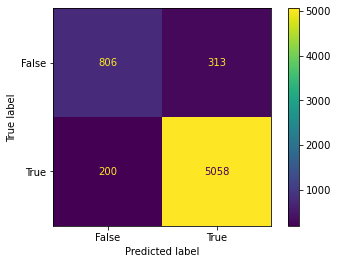

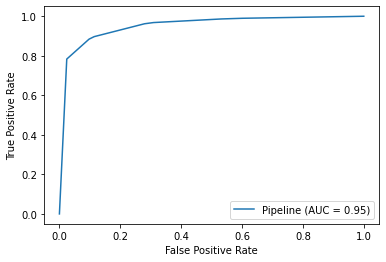

In [58]:
clf_dt = Pipeline(steps = [
('preprocessor', preprocessor),
('tree', DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=1))])

clf_dt.fit(X_train[used_cols], y_train)

train_preds = clf_dt.predict(X_train[used_cols])
test_preds = clf_dt.predict(X_test[used_cols])

train_probas = clf_dt.predict_proba(X_train[used_cols])[:, 1]
test_probas = clf_dt.predict_proba(X_test[used_cols])[:, 1]
    
param_grid = {
"tree__max_depth": [3, 4, 5],
"tree__min_samples_leaf": [1, 2, 10],}

gs = GridSearchCV(clf_dt, param_grid, cv=5, scoring="roc_auc")
gs.fit(X_train[used_cols], y_train)
    
evaluate(clf_dt, X_train[used_cols], X_test[used_cols], y_train, y_test)


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

Train F1: 0.9470
Train Precision: 0.9225
Train ROC-AUC: 0.8025
********************
Test F1: 0.9501
Test Precision: 0.9265
Test ROC-AUC: 0.8057


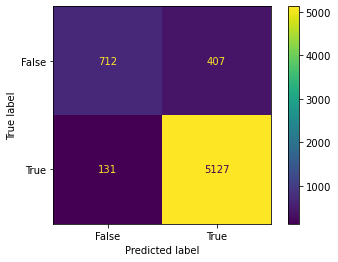

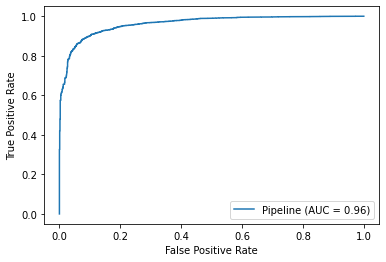

In [60]:
clf_rf = Pipeline(steps = [
('preprocessor', preprocessor),
('rf', RandomForestClassifier(random_state=42, max_depth=3, min_samples_leaf=1))])

clf_rf.fit(X_train[used_cols], y_train)

evaluate(clf_rf, X_train[used_cols], X_test[used_cols], y_train, y_test)
    

# Only looking at what we can control
- We learned that the majority of factors that contribute to a "Trending Video" are parameters that are out of our control. So We decided to rerun the model with only the parameters that would be within the video creators's control. The prediction results were obviously not as good, but they were still above the baseline model. This tells us that outside of the content of our video, we can still have an impact. 

In [61]:
df = df.drop(columns="likes")

In [62]:
df = df.drop(columns="dislikes")

In [63]:
df = df.drop(columns="comment_count")

In [64]:
df

,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,Number_of_Tags,Genre,description_length
0,11,2017,14,11,2017,13,True,1,People & Blogs,136
1,11,2017,14,11,2017,13,True,4,Entertainment,80
2,11,2017,14,11,2017,12,True,23,Comedy,74
3,11,2017,14,11,2017,13,True,27,Entertainment,123
4,11,2017,14,11,2017,12,True,14,Entertainment,53
...,...,...,...,...,...,...,...,...,...,...
40944,6,2018,14,5,2018,18,True,14,Pets & Animals,9
40945,6,2018,14,5,2018,18,True,1,People & Blogs,1
40946,6,2018,14,5,2018,18,True,24,Entertainment,67
40947,6,2018,14,5,2018,17,True,22,Film & Animation,242


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

In [66]:
X_test, X_hold, y_test, y_hold = train_test_split(X_test, y_test, random_state=42, test_size=.20)

In [67]:
cat_columns = [c for c in X_train.columns if X_train[c].dtype == 'O']
num_columns = [
    'Number_of_Tags',
    'description_length',
    'trending_month',
    'trending_year',
    'trending_day',
    'publish_month',
    'publish_year',
    'publish_day'
]
used_cols = [*cat_columns, *num_columns]
used_cols

cat_transformer = OneHotEncoder(drop='first', handle_unknown = 'error', sparse= False)

num_transformer = StandardScaler()
preprocessor = ColumnTransformer([
    ('cats', cat_transformer, cat_columns),
    ('nums', num_transformer, num_columns)
])

In [68]:
pd.Series(y_train).value_counts(normalize=True)

True     0.816774
False    0.183226
Name: Successful, dtype: float64

Train F1: 0.9006
Train Precision: 0.8194
Train ROC-AUC: 0.5089
********************
Test F1: 0.9047
Test Precision: 0.8263
Test ROC-AUC: 0.5049


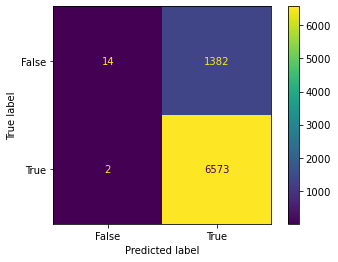

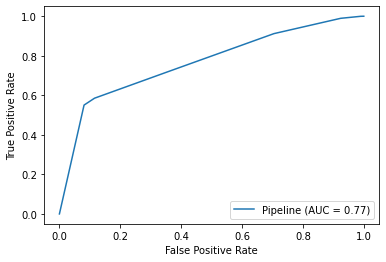

In [69]:
clf_dt = Pipeline(steps = [
('preprocessor', preprocessor),
('tree', DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=1))])

clf_dt.fit(X_train[used_cols], y_train)

train_preds = clf_dt.predict(X_train[used_cols])
test_preds = clf_dt.predict(X_test[used_cols])

train_probas = clf_dt.predict_proba(X_train[used_cols])[:, 1]
test_probas = clf_dt.predict_proba(X_test[used_cols])[:, 1]
    
param_grid = {
"tree__max_depth": [3, 4, 5],
"tree__min_samples_leaf": [1, 2, 10],}
    
gs = GridSearchCV(clf_dt, param_grid, cv=5, scoring="roc_auc")
gs.fit(X_train[used_cols], y_train)
    
evaluate(clf_dt, X_train[used_cols], X_test[used_cols], y_train, y_test)

Train F1: 0.8994
Train Precision: 0.8172
Train ROC-AUC: 0.5016
********************
Test F1: 0.9042
Test Precision: 0.8251
Test ROC-AUC: 0.5007


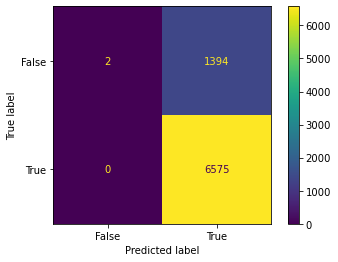

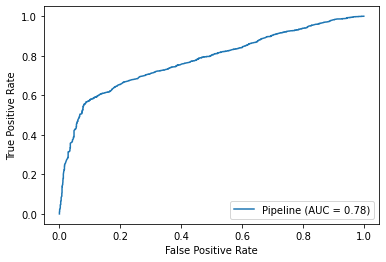

In [70]:
clf_rf = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42, max_depth=3, min_samples_leaf=1))
])

clf_rf.fit(X_train[used_cols], y_train)

evaluate(clf_rf, X_train[used_cols], X_test[used_cols], y_train, y_test)

# Twitch Data
- The last question we wanted to answer was when should we launch the series? To answer this question, we scraped viewership data from the Twitch Website. 
- The cleaning was relatively simple. First we removed label 'K' from the average so we could convert the values from strings to floats. Then we used the "Month" column to create two new columns that specifically focused on the "Months" and "Year".

In [71]:
resp = requests.get('https://twitchtracker.com/games/29595')
resp.status_code

520

In [72]:
twitch_viewers = pd.read_excel('data/Twitch_Statistics.xlsx', sheet_name=0)
twitch_viewers

,Month,Average,Gain,% Gain,Peak
0,2022-07-01,43.4K,-16025,-0.27,80.3K
1,2022-06-01,59.4K,3867,0.07,338K
2,2022-05-01,55.6K,-10089,-0.154,167K
3,2022-04-01,65.7K,13455,0.258,442K
4,2022-03-01,52.2K,5253,0.112,150K
...,...,...,...,...,...
64,2017-03-01,68.1K,16559,0.321,672K
65,2017-02-01,51.6K,3870,0.081,327K
66,2017-01-01,47.7K,-4905,-0.093,218K
67,2016-12-01,52.6K,-7709,-0.128,232K


In [73]:
twitch_viewers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    69 non-null     datetime64[ns]
 1   Average  69 non-null     object        
 2   Gain     69 non-null     object        
 3   % Gain   69 non-null     object        
 4   Peak     69 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 2.8+ KB


In [74]:
twitch_viewers['Average'] = twitch_viewers['Average'].astype('str').str.split('K')
twitch_viewers['Average'][0]

['43.4', '']

In [75]:
average_views = []
for number in list(range(0,len(twitch_viewers))):
    average_views.append(twitch_viewers['Average'][number][0])
average_views

['43.4',
 '59.4',
 '55.6',
 '65.7',
 '52.2',
 '47.0',
 '54.4',
 '60.0',
 '58.1',
 '51.5',
 '133',
 '48.3',
 '57.4',
 '57.1',
 '86.5',
 '65.4',
 '69.1',
 '53.7',
 '57.9',
 '53.2',
 '57.7',
 '56.9',
 '45.1',
 '52.9',
 '51.4',
 '48.3',
 '57.2',
 '68.8',
 '75.7',
 '56.3',
 '50.4',
 '59.3',
 '46.0',
 '48.4',
 '40.4',
 '35.9',
 '95.3',
 '55.1',
 '59.7',
 '62.8',
 '41.0',
 '67.5',
 '74.9',
 '62.5',
 '44.3',
 '64.1',
 '47.3',
 '41.3',
 '94.0',
 '39.0',
 '66.8',
 '52.5',
 '55.8',
 '53.6',
 '49.0',
 '41.6',
 '43.4',
 '55.0',
 '42.5',
 '40.3',
 '78.7',
 '32.8',
 '57.7',
 '46.6',
 '68.1',
 '51.6',
 '47.7',
 '52.6',
 '60.3']

In [76]:
twitch_viewers['Average'] = average_views

In [77]:
twitch_viewers['Average'] = twitch_viewers['Average'].astype(float)

In [83]:
twitch_viewers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    69 non-null     datetime64[ns]
 1   Average  69 non-null     float64       
 2   Gain     69 non-null     object        
 3   % Gain   69 non-null     object        
 4   Peak     69 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.8+ KB


In [84]:
twitch_viewers['Months'] = pd.DatetimeIndex(twitch_viewers['Month']).month

In [85]:
twitch_viewers['Year'] = pd.DatetimeIndex(twitch_viewers['Month']).year

In [86]:
twitch_viewers

,Month,Average,Gain,% Gain,Peak,Months,Year
0,2022-07-01,43.4,-16025,-0.27,80.3,7,2022
1,2022-06-01,59.4,3867,0.07,338.0,6,2022
2,2022-05-01,55.6,-10089,-0.154,167.0,5,2022
3,2022-04-01,65.7,13455,0.258,442.0,4,2022
4,2022-03-01,52.2,5253,0.112,150.0,3,2022
...,...,...,...,...,...,...,...
64,2017-03-01,68.1,16559,0.321,672.0,3,2017
65,2017-02-01,51.6,3870,0.081,327.0,2,2017
66,2017-01-01,47.7,-4905,-0.093,218.0,1,2017
67,2016-12-01,52.6,-7709,-0.128,232.0,12,2016


- 2022 is not yet over and so we removed it from our data. We focused on the last 4 years (2018-2021)

In [87]:
twitch_viewers = twitch_viewers.loc[twitch_viewers['Year'] != 2022]

In [88]:
twitch_viewers['Year']

7     2021
8     2021
9     2021
10    2021
11    2021
      ... 
64    2017
65    2017
66    2017
67    2016
68    2016
Name: Year, Length: 62, dtype: int64

- Lastly we created a graph visualizing the viewership trends of the past four years to look for patterns. The trend we found is that each years peak viewership aligns with the World Tournament every year. This peak tends to last for 2 whole months before expereincing a huge dropoff. The one exception being the year 2020, because there was no world tournament that year due to Covid_19. 

In [89]:
month_map = dict(zip(twitch_viewers['Months'].unique(), 
                     twitch_viewers['Month'].dt.month_name().unique()))

In [90]:
month_map = {k:v for k, v in sorted(month_map.items(), key=lambda x: x[0])}
month_map

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [91]:
colors = ['#cb6ce6', '#5ce1e6', 'r', '#ff914d']

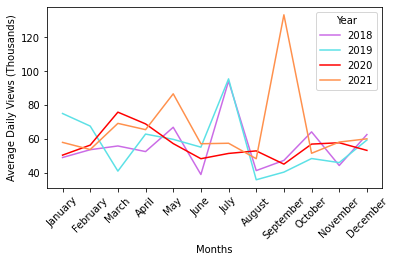

In [92]:
fig,ax = plt.subplots()
sns.lineplot(x='Months', y='Average', hue='Year', palette = colors, ax = ax,
            data=twitch_viewers.loc[twitch_viewers['Year'].isin([2018, 2019, 2020, 2021])])
ax.set_xticks(list(month_map.keys()))
ax.set_xticklabels(month_map.values())
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.25)
ax.set_ylabel("Average Daily Views (Thousands)")
plt.savefig('Images')